In [10]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Columnas disponibles: Index(['semana', 'chatgpt:_(todo_el_mundo)', 'copilot:_(todo_el_mundo)',
       'gemini:_(todo_el_mundo)'],
      dtype='object')


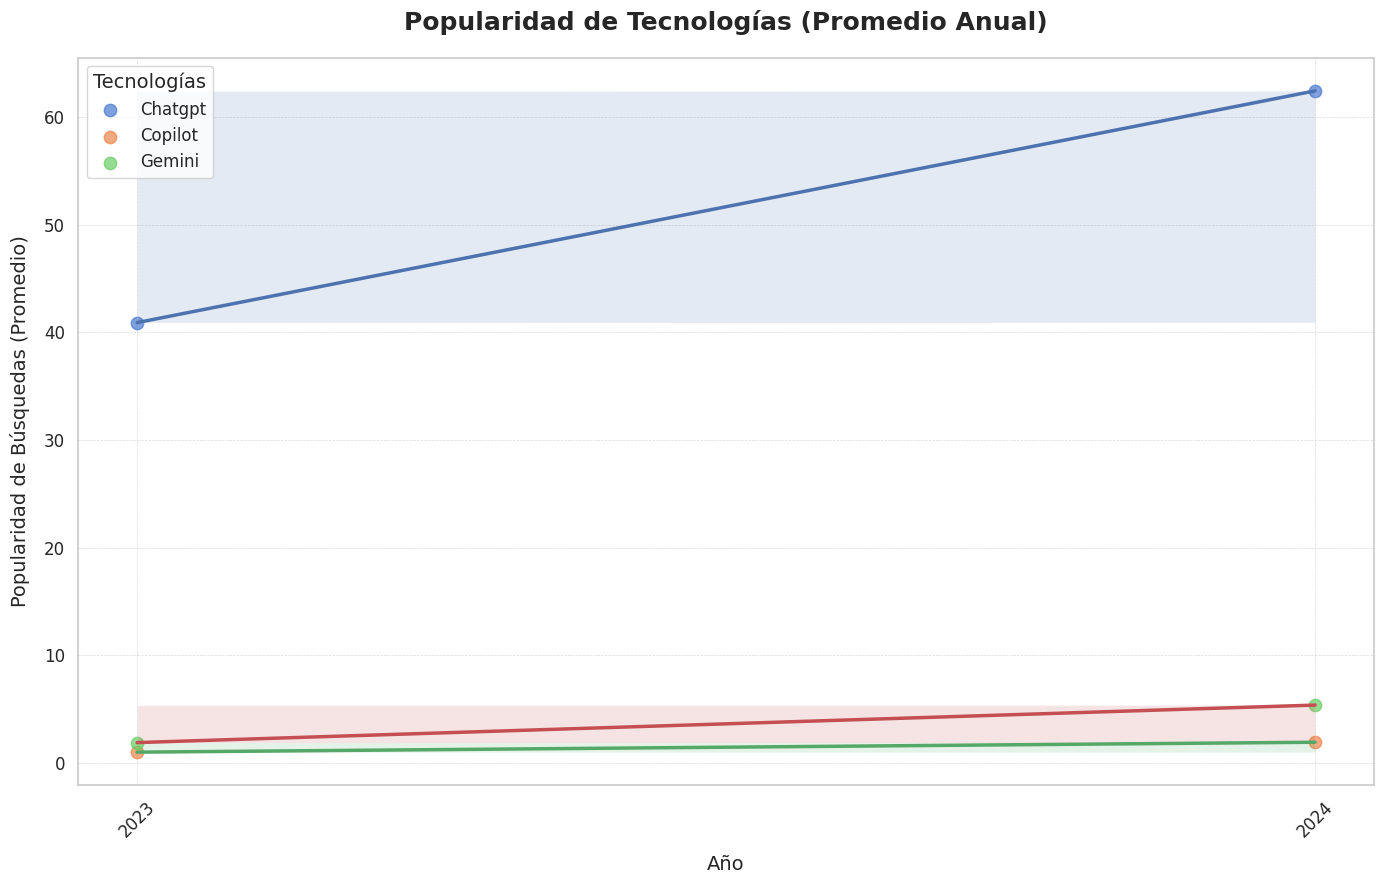


Matriz de correlación entre las tecnologías:
                          chatgpt:_(todo_el_mundo)  copilot:_(todo_el_mundo)  \
chatgpt:_(todo_el_mundo)                       1.0                       1.0   
copilot:_(todo_el_mundo)                       1.0                       1.0   
gemini:_(todo_el_mundo)                        1.0                       1.0   

                          gemini:_(todo_el_mundo)  
chatgpt:_(todo_el_mundo)                      1.0  
copilot:_(todo_el_mundo)                      1.0  
gemini:_(todo_el_mundo)                       1.0  


In [11]:


# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid", palette="muted")

# Cargar el archivo Excel
data_excel = pd.read_excel('/content/Graficos/multiTimeline-_4_.xlsx')

# Normalizar los nombres de las columnas
data_excel.columns = data_excel.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar los nombres de las columnas
print("Columnas disponibles:", data_excel.columns)

# Especificar las columnas relevantes según los datos disponibles
cols_to_convert = [
    'chatgpt:_(todo_el_mundo)',
    'copilot:_(todo_el_mundo)',
    'gemini:_(todo_el_mundo)'
]

# Convertir las columnas de popularidad a tipo numérico
data_excel[cols_to_convert] = data_excel[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Convertir la columna 'semana' a tipo datetime
data_excel['semana'] = pd.to_datetime(data_excel['semana'])

# Extraer el año y agregarlo como una nueva columna
data_excel['año'] = data_excel['semana'].dt.year

# Agrupar los datos por año y calcular el promedio anual
data_excel_grouped = data_excel.groupby('año').mean().reset_index()

# Crear un gráfico combinado para todas las tecnologías
plt.figure(figsize=(14, 9))

# Diccionario para colores de cada tecnología
tecnologias = {
    'chatgpt:_(todo_el_mundo)': '#4C72B0',  # Azul oscuro
    'copilot:_(todo_el_mundo)': '#55A868',  # Verde
    'gemini:_(todo_el_mundo)': '#C44E52'   # Rojo
}

# Graficar cada tecnología en el mismo eje
for tecnologia, color in tecnologias.items():
    sns.regplot(
        x=data_excel_grouped['año'],
        y=data_excel_grouped[tecnologia],
        scatter_kws={'s': 80, 'alpha': 0.7},  # Tamaño y transparencia de los puntos
        line_kws={'color': color, 'linewidth': 2.5},  # Color y grosor de la línea
        label=tecnologia.split(":")[0].capitalize()  # Etiqueta del gráfico
    )

# Configurar el gráfico combinado
plt.title('Popularidad de Tecnologías (Promedio Anual)', fontsize=18, pad=20, weight='bold')
plt.xlabel('Año', fontsize=14, labelpad=10)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=14, labelpad=10)
plt.xticks(data_excel_grouped['año'], fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title="Tecnologías", fontsize=12, title_fontsize=14, loc='upper left', frameon=True)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

# Calcular y mostrar correlaciones entre tecnologías
correlation_matrix = data_excel_grouped[cols_to_convert].corr()
print("\nMatriz de correlación entre las tecnologías:")
print(correlation_matrix)
